# General relativity using symbolic computer algebra

In [3]:
from gravipy import *
init_printing()

## Tolman-Oppenheimer-Volkoff equation

In this notebook, we will consider the stationary space-time inside a spherically symmetric mass distribution. In contrast to the [derivation of the outer Schwarzschild solution](SchwarzschildMetric.ipynb), we now have to solve an inhomogeneous Einstein field equation. Doing so will lead us to the Tolman-Oppenheimer-Volkoff equation, a differential equation for the pressure inside the object as a function of the radius. As this differential equation depends on the matter density, an equation of state is required to obtain the radial dependence of the pressure. It then becomes possible to draw conclusions about the stability of stellar objects. 

#### Metric tensor and energy-momentum tensor

We start out with a time-independent, spherically symmetric metric tensor as we did for the outer Schwarzschild solution. Here, we use a somewhat different but equivalent ansatz where we set $A(r)=\text{e}^{2\alpha(r)}$ and $B(r)=\text{e}^{2\beta(r)}$. This ansatz could have been used in the derivation of the outer Schwarzschild solution as well. Setting up the metric tensor is done basically in the same way as we did when deriving the [outer Schwarzschild solution](SchwarzschildMetric.ipynb).

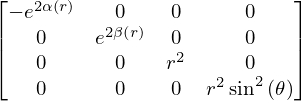

In [5]:
t, r, theta, phi = symbols(r't, r, \theta, \phi')
x = Coordinates('x', [t, r, theta, phi])
alpha = Function(r'\alpha')(r)
beta = Function(r'\beta')(r)
Metric = diag(-exp(2*alpha), exp(2*beta), r**2, r**2*sin(theta)**2)
g = MetricTensor('g', x, Metric)
g(All, All)

The corresponding line element reads

$$\text{d}s^2 = -\text{e}^{2\alpha(r)}c^2\text{d}t^2+\text{e}^{2\beta(r)}\text{d}r^2
                +r^2\text{d}\theta^2+r^2\sin^2(\theta)\text{d}\phi^2.$$
                
Note that the SymPy symbol `t` is intended to mean $ct$ so that there is a factor of $c$ hidden.

The energy-momentum tensor $T_{mu\nu}$ of an ideal fluid described by its pressure $p$ and density $\rho$ is given by

$$T_{\mu\nu} = \left(\rho+\frac{p}{c^2}\right)u_\mu u_\nu+pg_{\mu\nu}$$

where $u_\mu$ is the four-velocity of the corresponding fluid element.

The four-velocity has to satisfy the normalization

$$u_\mu u^\mu = g^{\mu\nu}u_\mu u_\nu = -c^2.$$

In the restframe of the fluid element, the four-velocity thus is given by

$$u_\mu = (c\text{e}^{\alpha}, 0, 0, 0).$$

We can now introduce the energy-momentum tensor of an ideal liquid at rest.

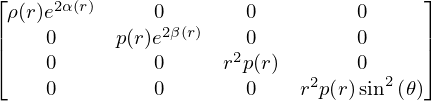

In [8]:
p = Function('p')(r)
rho = Function(r'\rho')(r)
T = Tensor('T', 2, g, components=diag(exp(2*alpha)*rho, exp(2*beta)*p,
                                      r**2*p, r**2*sin(theta)**2*p))
T(All, All)

Raising one or two indices, the energy-momentum tensor takes the form

$T^{\mu}_{\nu}$

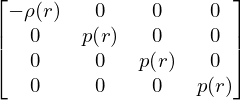

In [19]:
T(-All, All)

$T^{\mu\nu}$

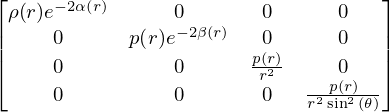

In [20]:
T(-All, -All)

#### Analysis of the field equation

After having obtained the energy-momentum tensor, it remains to derive the Einstein tensor for the ansatz of the metric tensor.

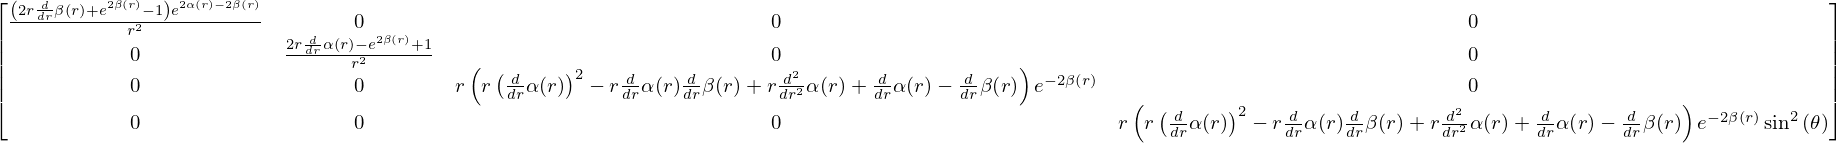

In [24]:
Gamma = Christoffel('\Gama', g)
Ric = Ricci('Ric', g)
G = Einstein('G', Ric)
G(All, All)

As expected, the Einstein tensor is diagonal and its $\theta\theta$- and $\phi\phi$-components are trivially related as is the case for the energy-momentum tensor.

In [25]:
G(4, 4)/G(3, 3)

In [26]:
T(4, 4)/T(3, 3)

It is thus sufficient to consider the $tt$-, $rr$-, and $\theta\theta$-components of the Einstein field equation. Here, we introduce the abbreviation $\kappa = 8\pi G/c^4$.

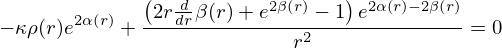

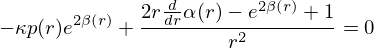

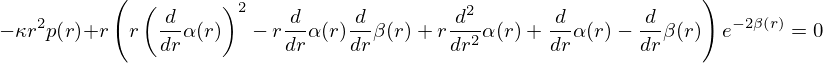

In [39]:
kappa = symbols(r'\kappa')
for n in range(1, 4):
    display(Eq(G(n, n)-kappa*T(n, n), 0))

#### Mass of the stellar object

Closer inspection reveals that the first equation does in fact not depend on $\alpha(r)$. It turns out that the $tt$-component of the Einstein field equation is simplified by introducing a new function
$$m(r) = \frac{4\pi}{\kappa c^2}r\left(1-\mathrm{e}^{-2\beta}\right).$$
Taking the derivative, we find

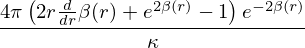

In [41]:
m = Function('m')(r)
m = 4*pi/kappa*r*(1-exp(-2*beta))
simplify(diff(m, r))

which apart from some trivial factors appears in the second term of the $tt$-component of the Einstein field equation.

We thus arrive at 
$$\frac{\mathrm{d}m}{\mathrm{d}r} = 4\pi r^2\rho(r)$$
or
$$m(r) = 4\pi\int_0^r\mathrm{d}r'r'^2\rho(r').$$

To understand the meaning of this quantity, we calculate the total mass of a start with radius $R$ and density $\rho(r)$. The spatial volume element is given by

$$\text{d}V = \sqrt{g_{11}g_{22}g_{33}}\text{d}r\text{d}\theta\text{d}\phi$$

where the prefactor on the right-hand side is found as

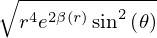

In [45]:
sqrt(g(2, 2)*g(3, 3)*g(4, 4))

so that
$$\text{d}V = \text{e}^{\beta(r)}r^2\text{d}r\sin(\theta)\text{d}\theta\text{d}\phi.$$
The total mass thus reads
$$M = 4\pi\int_0^R\text{d}r\,r^2\text{e}^\beta\rho(r).$$
Solving the definition of $m(r)$ for $\text{e}^\beta$, we obtain
$$M = 4\pi\int_0^R\text{d}r\frac{r^2\rho(r)}{\sqrt{1-\frac{\kappa}{4\pi}\frac{m(r)c^2}{r}}}.$$

Compared with the integral expression for $m(r)$ given above, we find

$$M > m(R).$$

Solving the definition of $m(R)$ for $\text{e}^{2\beta}$, we find
$$\text{e}^{2\beta(R)} = 1-\frac{2Gm(R)}{c^2R}.$$

Comparing with the outer Schwarzschild solution, we conclude from the continuity of the solution that $m(R)$ is the mass of the stellar object seen from the outside. The large mass $M$ differs from $m(R)$ by the gravitational binding energy of the fluid.

#### Tolman-Oppenheimer-Volkoff equation

While the derivative of $\alpha(r)$ could be obtained from the $rr$-component of the Einstein field equation, it is more convenient to consider energy-momentum conservation
$$T^{\mu\nu}{}_{;\mu} = 0$$
instead, where the semicolon denotes a covariant derivative. The covariant derivative and the contraction can easily be carried out with the help of the `covariantD` method inherited by `Tensor` objects from GraviPy's `GeneralTensor` class.

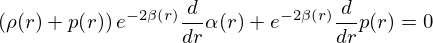

In [46]:
for nu in range(1, 5):
    display(Eq(sum(T.covariantD(-n, -nu, n) for n in range(1, 5)), 0))

Three of the four equations are identically fulfilled as indicated by the Boolean `True`. From the $rr$-component, we find

$$\frac{\mathrm{d}\alpha}{\mathrm{d}r} = -\frac{1}{\rho c^2+p}\frac{\mathrm{d}p}{\mathrm{d}r},$$

where we have reinserted a factor $c^2$ not present in our GraviPy calculation because we had not kept the corresponding factor in the first term of the energy-momentum tensor of an ideal fluid.

Inserting this result into the $rr$-component of the Einstein field equation, we arrive at the *Tolman-Oppenheimer-Volkoff* equation

$$\frac{\mathrm{d}p}{\mathrm{d}r} = -\frac{\kappa}{8\pi}\frac{(\rho c^2+p)\left(\dfrac{m(r)c^2}{r}+4\pi r^2p\right)}{r\left(1-\dfrac{\kappa}{4\pi}\dfrac{m(r)c^2}{r}\right)}$$

In the classical limit, we have to keep the first terms in all factors appearing in the last fraction on the right-hand side. Specifically, the last term in the denominator can be neglected even though it seems to be proportional to $c^2$ because $kappa$ contains a factor $1/c^4$.

Keeping the relevant terms, we find in the classical limit

$$\frac{\text{d}p}{\text{d}r}=-\frac{Gm(r)}{r^2}\rho = -g(r)\rho$$

which is nothing else than the equation governing hydrostatic equilibrium.

To proceed further from the Tolman-Oppenheimer-Volkoff equation, one needs to specify a state equation $p=p(\rho)$. Depending on the situation, different models can be appropriate. For white dwarfs, the electron degeneracy pressure is relevant and leads to the Chandrasekhar limit of about 1.4 solar masses. The degeneracy pressure of neutrons stabilizes neutron stars up to the Oppenheimer-Volkoff limit of 3-4 solar masses.

#### Further reading

R. R. Silbar and S. Reddy, *Neutron stars for undergraduates*, [Am. J. Phys. **72**, 892 (2004)](https://doi.org/10.1119/1.1703544).